# 数据归一化处理

将所有数据映射到同一尺度中。 <br><br>
最值归一化（normalization）：把所有数据映射到0-1之间。 <br>
Xscale = (X - Xmin) / (Xmax - Xmin) <br>
适用于分布有明显边界的情况；受outlier影响较大。 <br><br>
一种改进： <br>
均值方差归一化（standardization）：把所有数据归一到均值为0方差为1的分布中。 <br>
适用于数据分布无明显便捷的情况；有可能存在极端数据值。 <br>
Xscale = (X - Xmean) / S

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化 Normalization

一维数组

In [5]:
x = np.random.randint(0, 100, size=100)

In [6]:
x

array([45, 73, 79, 85, 24, 65, 52, 48, 34, 15, 44, 63, 45, 64, 84, 11,  5,
       73, 59,  1, 46, 88, 18, 57, 63,  5, 26,  9, 19, 91,  1, 55, 28, 90,
       66, 56, 86, 54, 17, 21, 88, 75, 58, 38, 28, 71, 74, 16, 50, 63, 42,
       70, 45, 45, 81, 95, 62, 33, 32,  3,  1, 10, 57, 71, 91, 56, 26,  8,
       21, 72, 90, 79, 97, 94, 64, 61, 70, 40,  7, 51, 62, 51, 41, 44, 24,
       62, 60, 78, 45, 43, 88, 51, 61, 40, 18, 66, 70, 93, 73,  4])

经过处理，x中的每一个值都在0-1之间了。

In [7]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.45833333, 0.75      , 0.8125    , 0.875     , 0.23958333,
       0.66666667, 0.53125   , 0.48958333, 0.34375   , 0.14583333,
       0.44791667, 0.64583333, 0.45833333, 0.65625   , 0.86458333,
       0.10416667, 0.04166667, 0.75      , 0.60416667, 0.        ,
       0.46875   , 0.90625   , 0.17708333, 0.58333333, 0.64583333,
       0.04166667, 0.26041667, 0.08333333, 0.1875    , 0.9375    ,
       0.        , 0.5625    , 0.28125   , 0.92708333, 0.67708333,
       0.57291667, 0.88541667, 0.55208333, 0.16666667, 0.20833333,
       0.90625   , 0.77083333, 0.59375   , 0.38541667, 0.28125   ,
       0.72916667, 0.76041667, 0.15625   , 0.51041667, 0.64583333,
       0.42708333, 0.71875   , 0.45833333, 0.45833333, 0.83333333,
       0.97916667, 0.63541667, 0.33333333, 0.32291667, 0.02083333,
       0.        , 0.09375   , 0.58333333, 0.72916667, 0.9375    ,
       0.57291667, 0.26041667, 0.07291667, 0.20833333, 0.73958333,
       0.92708333, 0.8125    , 1.        , 0.96875   , 0.65625

X有2个特征，每个特征都是一个在0-100之间的随机数，一共有50个样本。

二维矩阵

In [8]:
X = np.random.randint(0, 100, (50, 2))

In [9]:
X[:10,:]

array([[92, 43],
       [20, 90],
       [95, 94],
       [61, 27],
       [90, 49],
       [24, 75],
       [77, 70],
       [78, 70],
       [20, 23],
       [ 3, 33]])

In [10]:
X = np.array(X, dtype=float) # 将X强转为浮点数

In [11]:
X[:10,:]

array([[92., 43.],
       [20., 90.],
       [95., 94.],
       [61., 27.],
       [90., 49.],
       [24., 75.],
       [77., 70.],
       [78., 70.],
       [20., 23.],
       [ 3., 33.]])

In [12]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

In [13]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [14]:
X[:10,:]

array([[0.93814433, 0.43877551],
       [0.19587629, 0.91836735],
       [0.96907216, 0.95918367],
       [0.6185567 , 0.2755102 ],
       [0.91752577, 0.5       ],
       [0.2371134 , 0.76530612],
       [0.78350515, 0.71428571],
       [0.79381443, 0.71428571],
       [0.19587629, 0.23469388],
       [0.02061856, 0.33673469]])

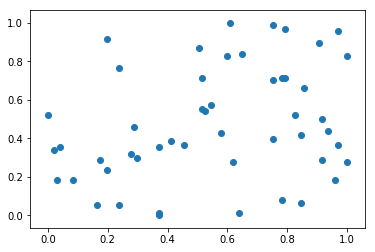

In [16]:
plt.scatter(X[:,0], X[:,1])

In [17]:
np.mean(X[:,0])

0.5577319587628867

In [18]:
np.std(X[:,0])

0.30303141253979693

In [19]:
np.mean(X[:,1])

0.47346938775510206

In [20]:
np.std(X[:,1])

0.2915297371998325

### 均值方差归一化 Standardization

In [21]:
X2 = np.random.randint(0, 100, (50, 2))

In [22]:
X2 = np.array(X2, dtype=float)

In [24]:
for i in range(0, 2):
    X2[:,i] = (X2[:,i] - np.mean(X2[:,i])) / np.std(X2[:,i])

由图像可知，我们并不能保证，取值在0-1之间。 <br>
使用均值方差归一化方法本质是将所有数据的均值，也就是中心值，放在了0的位置，而它的分布的幅度，方差放在了1这样的位置，即使数据中有outlier、有极端值，数据整体依然满足均值为0，方差为1，也就是它不会形成一个有偏的数据，这就是对于最值归一化的方法来说，均值方差归一化它的优点。

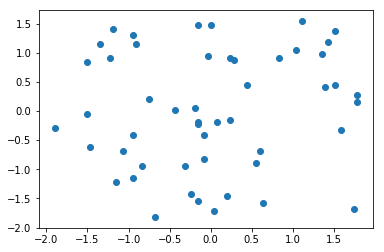

In [25]:
plt.scatter(X2[:,0], X2[:,1])

In [26]:
np.mean(X2[:,0])

-6.078471059822732e-17

In [27]:
np.std(X2[:,0])

1.0

In [28]:
np.mean(X2[:,1])

-3.9968028886505634e-17

In [29]:
np.std(X2[:,1])

0.9999999999999999